# DeepLearning_with_Keras_ch03

- https://github.com/oreilly-japan/deep-learning-with-keras-ja

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Config" data-toc-modified-id="Config-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Config</a></span><ul class="toc-item"><li><span><a href="#Import" data-toc-modified-id="Import-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import</a></span><ul class="toc-item"><li><span><a href="#TensorFlow,-Keras" data-toc-modified-id="TensorFlow,-Keras-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>TensorFlow, Keras</a></span></li></ul></li><li><span><a href="#Path" data-toc-modified-id="Path-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Path</a></span></li><li><span><a href="#Import-2" data-toc-modified-id="Import-2-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Import 2</a></span></li><li><span><a href="#[Class]-PlotLearningLogCallback" data-toc-modified-id="[Class]-PlotLearningLogCallback-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>[Class] PlotLearningLogCallback</a></span></li></ul></li><li><span><a href="#MNIST-LeNet" data-toc-modified-id="MNIST-LeNet-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>MNIST LeNet</a></span><ul class="toc-item"><li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Load Data</a></span></li><li><span><a href="#Model" data-toc-modified-id="Model-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Model</a></span></li><li><span><a href="#Computation-Graph" data-toc-modified-id="Computation-Graph-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Computation Graph</a></span></li><li><span><a href="#Fit" data-toc-modified-id="Fit-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Fit</a></span></li></ul></li><li><span><a href="#CIFAR-10---Neural-Network" data-toc-modified-id="CIFAR-10---Neural-Network-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>CIFAR-10 - Neural Network</a></span></li><li><span><a href="#ImageNet---VGG16" data-toc-modified-id="ImageNet---VGG16-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>ImageNet - VGG16</a></span></li><li><span><a href="#VGG16-for-Feature-Extraction" data-toc-modified-id="VGG16-for-Feature-Extraction-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>VGG16 for Feature Extraction</a></span></li><li><span><a href="#END" data-toc-modified-id="END-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>END</a></span></li></ul></div>

## Config

### Import

In [1]:
# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload
# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2
# If you want to reload manually, add a below line head.
%aimport
# ref: https://ipython.org/ipython-doc/3/config/extensions/autoreload.html

from __future__ import (print_function, absolute_import)

import os,sys
import re
import random
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import tifffile
import cv2
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
import skimage
from skimage.external import tifffile as sktiff

print("numpy ver: {}".format(np.__version__))
print("opencv ver: {}".format(cv2.__version__))
print("pandas ver: {}".format(pd.__version__))
print("scikit-learn ver: {}".format(sklearn.__version__))
print("scikit-image ver: {}".format(skimage.__version__))

Modules to reload:
all-except-skipped

Modules to skip:



/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


numpy ver: 1.15.0
opencv ver: 3.4.2
pandas ver: 0.23.3
scikit-learn ver: 0.19.2
scikit-image ver: 0.14.0


In [2]:
# pandas dataframe display optioins
# display size of DataFrame
print("pd.options.display.max_rows    (default):  60")
print("pd.options.display.max_columns (default):  20")

pd.options.display.max_rows    (default):  60
pd.options.display.max_columns (default):  20


#### TensorFlow, Keras

In [3]:
#________________________________________________________________________________
#  TensorFlow and Keras GPU configures
##________________________________________
##  OPTIONAL : set a GPU viewed by TensorFlow
###____________________
###  - https://stackoverflow.com/questions/37893755/tensorflow-set-cuda-visible-devices-within-jupyter
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="1"
###____________________

##________________________________________
##  TensorFlow
##________________________________________
import tensorflow as tf
print("tensorflow ver: {}".format(tf.__version__))
# You can double check that you have the correct devices visible to TF
#   - https://stackoverflow.com/questions/37893755/tensorflow-set-cuda-visible-devices-within-jupyter
from tensorflow.python.client import device_lib
print("""
________________________________________
Visible GPUs from TensorFlow
________________________________________""")
for _device in device_lib.list_local_devices():
    match = re.search(pattern=r'name: "/device:(?P<name>[A-Z]{3}):(?P<device_num>\d{1})*',
                      string=str(_device))
    if match is None:
        print("Not Match")
        continue
    if match.group("name") == "CPU":
        name, device_num = match.group("name", "device_num")
        print()
        print("({}:{})".format(name, device_num))
        continue
    name, device_num = match.group("name", "device_num")
    match = re.search(pattern=r'.*pci bus id: (?P<pci_bus_id>\d{4}:\d{2}:\d{2}.\d{1}).*',
                      string=str(_device))
    if match is None:
        print("No GPUs")
        continue
    print("({}:{}: pci_bus_id: {})".format(name, device_num, match.group("pci_bus_id")))
print("________________________________________")

###____________________
###  sessioin
###____________________
global _SESSION
config = tf.ConfigProto(allow_soft_placement=True,
                        log_device_placement=True)
config.gpu_options.allow_growth = True
_SESSION = tf.Session(config=config)

##________________________________________
##  Keras
##________________________________________
import keras
print("keras ver: {}".format(keras.__version__))
import keras.backend as K
import keras_tqdm
from keras_tqdm import TQDMNotebookCallback

K.set_session(session=_SESSION)

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


tensorflow ver: 1.9.0

________________________________________
Visible GPUs from TensorFlow
________________________________________

(CPU:0)
(GPU:0: pci_bus_id: 0000:02:00.0)
________________________________________
keras ver: 2.2.2


Using TensorFlow backend.


### Path

In [4]:
HOME = Path(os.getcwd()).parent
print(HOME)

/home/pollenjp/workdir/git/__book__deep-learning-with-keras


In [5]:
path_list = []
data_Path = HOME / "data"
path_list.append(data_Path)
input_Path = data_Path / "raw"
path_list.append(input_Path)
plot_images_Path = data_Path / "plot_images"
path_list.append(plot_images_Path)
tensorboard_Path = HOME / "tensorboard"
path_list.append(tensorboard_Path)

for _Path in path_list:
    _path = str(_Path)
    if not os.path.exists(_path):
        os.makedirs(name=_path)
        print("make a directory: \n\t", _path)
    else:
        print(os.path.exists(_path), ": ", _path)

True :  /home/pollenjp/workdir/git/__book__deep-learning-with-keras/data
True :  /home/pollenjp/workdir/git/__book__deep-learning-with-keras/data/raw
True :  /home/pollenjp/workdir/git/__book__deep-learning-with-keras/data/plot_images
True :  /home/pollenjp/workdir/git/__book__deep-learning-with-keras/tensorboard


### Import 2

In [6]:
sys.path.append(str(HOME / "src" / "data"))
sys.path.append(str(HOME / "src" / "models"))
sys.path.append(str(HOME / "src" / "utils_keras"))
sys.path.append(str(HOME / "src" / "utils_tensorflow"))

In [7]:
sys.path

['',
 '/usr/lib/python35.zip',
 '/usr/lib/python3.5',
 '/usr/lib/python3.5/plat-x86_64-linux-gnu',
 '/usr/lib/python3.5/lib-dynload',
 '/home/pollenjp/.local/lib/python3.5/site-packages',
 '/usr/local/lib/python3.5/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.5/dist-packages/IPython/extensions',
 '/home/pollenjp/.ipython',
 '/home/pollenjp/workdir/git/__book__deep-learning-with-keras/src/data',
 '/home/pollenjp/workdir/git/__book__deep-learning-with-keras/src/models',
 '/home/pollenjp/workdir/git/__book__deep-learning-with-keras/src/utils_keras',
 '/home/pollenjp/workdir/git/__book__deep-learning-with-keras/src/utils_tensorflow']

In [8]:
from mnist_dataset import MNISTDataset
import model_functions as myModelFunc
from mnist_lenet_trainer import MnistLenetTrainer
import tensorflow_graph_in_jupyer

### [Class] PlotLearningLogCallback

In [ ]:
import matplotlib.pyplot as plt
import keras
from IPython.display import clear_output

class PlotLearningLogCallback(keras.callbacks.Callback):
    """
    reference : https://github.com/stared/livelossplot
    """
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        self.acc = []
        self.val_acc = []
        self.fig = plt.figure()
        self.logs = []
        #self.f, (self.ax1, self.ax2) = plt.subplots(1, 2, sharex=True)
        self.max_epoch = self.params["epochs"]

    def on_epoch_end(self, epoch, logs={}):
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.acc.append(logs.get('acc'))
        self.val_acc.append(logs.get('val_acc'))
        self.i += 1

        #f, (ax1, ax2) = plt.subplots(1, 2, sharex=True)
        fig = plt.figure(figsize=(15, 5))
        clear_output(wait=True)
        val_list = [("loss", self.losses, self.val_losses),
                    ("acc",  self.acc,    self.val_acc)]
        for idx, (label, val1, val2) in enumerate(val_list, start=1):
            ax = fig.add_subplot(1, 2, idx)
            if label == "loss":
                ax.set_yscale('log')
            ax.plot(self.x, val1, label=label)
            ax.plot(self.x, val2, label="val_{}".format(label))
            ax.set_xlim(left=-0.5, right=self.max_epoch)
            ax.legend()
        plt.show()

## MNIST LeNet

### Load Data

In [10]:
dataset = MNISTDataset()
print(dataset.image_shape)

(28, 28, 1)


In [11]:
x_train, y_train, x_test, y_test = dataset.get_batch()

### Model

In [12]:
K.clear_session()
model = myModelFunc.lenet(input_shape=dataset.image_shape, num_classes=dataset.num_classes)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 20)        520       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 50)        25050     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 50)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2450)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               1225500   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5010      
__________

In [13]:
from keras.optimizers import Adam

In [14]:
opt = Adam()
metrics=["accuracy"]
model.compile( loss="categorical_crossentropy", optimizer=opt, metrics=metrics )

### Computation Graph

In [15]:
tensorflow_graph_in_jupyer.show_graph(graph_def=tf.get_default_graph())

### Fit

In [16]:
from keras.callbacks import TensorBoard

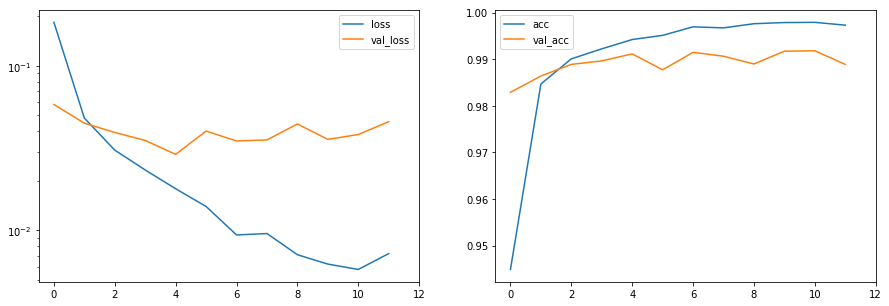

In [17]:
log_dir = str(tensorboard_Path / "mnist_lenet_log")
if os.path.exists(path=log_dir):
    import shutil
    shutil.rmtree(path=log_dir)

plot_log = PlotLearningLogCallback()
callbacks = [
    TensorBoard(log_dir=log_dir),
    plot_log,
    #livelossplot.PlotLossesKeras(),
]
model.fit(x=x_train, y=y_train, batch_size=128, epochs=12, verbose=1, callbacks=callbacks, validation_split=0.2)

In [18]:
for epoch, (loss, acc, val_loss, val_acc) in enumerate(zip(plot_log.losses,
                                                           plot_log.acc,
                                                           plot_log.val_losses,
                                                           plot_log.val_acc), start=1):
    print("loss: {:>.6f} | acc: {:>.6f} | val_loss: {:>.6f} | val_acc: {:>.6f} |".format(loss, acc, val_loss, val_acc))

loss: 0.184175 | acc: 0.944896 | val_loss: 0.058306 | val_acc: 0.982917 |
loss: 0.048176 | acc: 0.984708 | val_loss: 0.044870 | val_acc: 0.986417 |
loss: 0.030754 | acc: 0.990104 | val_loss: 0.039390 | val_acc: 0.988917 |
loss: 0.023294 | acc: 0.992250 | val_loss: 0.035214 | val_acc: 0.989667 |
loss: 0.017908 | acc: 0.994250 | val_loss: 0.028991 | val_acc: 0.991167 |
loss: 0.013970 | acc: 0.995146 | val_loss: 0.040159 | val_acc: 0.987750 |
loss: 0.009373 | acc: 0.996979 | val_loss: 0.034961 | val_acc: 0.991500 |
loss: 0.009563 | acc: 0.996750 | val_loss: 0.035480 | val_acc: 0.990667 |
loss: 0.007106 | acc: 0.997646 | val_loss: 0.044361 | val_acc: 0.989000 |
loss: 0.006233 | acc: 0.997896 | val_loss: 0.035750 | val_acc: 0.991750 |
loss: 0.005782 | acc: 0.997938 | val_loss: 0.038269 | val_acc: 0.991833 |
loss: 0.007218 | acc: 0.997333 | val_loss: 0.045809 | val_acc: 0.988917 |


## CIFAR-10 - Neural Network

## ImageNet - VGG16

In [19]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input, decode_predictions
import keras.preprocessing.image as Image
import numpy as np

In [20]:
model = VGG16(weights="imagenet", include_top=True)

In [21]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [22]:
tensorflow_graph_in_jupyer.show_graph(graph_def=tf.get_default_graph())

In [23]:
image_path = str(input_Path / "sample_images_pretrain" / "steaming_train.png")
image = Image.load_img(image_path, target_size=(224, 224))  # imagenet size

In [24]:
x = Image.img_to_array(image)
x = np.expand_dims(x, axis=0)  # add batch size dim
x = preprocess_input(x)

In [25]:
result = model.predict(x)
result = decode_predictions(result, top=3)[0]
print(result[0][1])  # show description

steam_locomotive


## VGG16 for Feature Extraction

In [26]:
from keras.applications.vgg19 import VGG19
from keras.preprocessing import image
from keras.applications.vgg19 import preprocess_input
from keras.models import Model
import numpy as np

In [ ]:
base_model = VGG19(weights="imagenet")

A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of cbe5617147190e668d6c5d5026f83318 so we will re-download the data.
  8495104/574710816 [..............................] - ETA: 1:16:40

In [ ]:
model = Model(inputs=base_model.input, outputs=base_model.get_layer("block4_pool").output)

In [ ]:
img_path = "sample_images_pretrain/elephant.jpg"
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

block4_pool_features = model.predict(x)

## END